# ML Course - Final Project

# 1.


Eylon Shetrit - 316592559

Eilon Levi - 314999079

Guy Rahamim - 208853283

Ori Elkabez - 209478411 


## 2.About the problem
number of deaths due to heart failure has been increasing in recent years. According to the World Health Organization (WHO), approximately 17 million people die from cardiovascular diseases, including heart failure, each year. This represents 31% of all deaths globally.

It is important to note that heart failure is a complex condition that can be caused by a variety of underlying factors, including high blood pressure, heart disease, and diabetes. Early detection and proper management of these risk factors can help to prevent the development of heart failure and reduce the number of deaths due to this condition.

# Features Description

age: age in years


sex: sex (1 = male; 0 = female)


cp: chest pain type


-- Value 0: typical angina


-- Value 1: atypical angina


-- Value 2: non-anginal pain


-- Value 3: asymptomatic


trestbps: resting blood pressure (in mm Hg on admission to the hospital)


chol: serum cholestoral in mg/dl


fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


restecg: resting electrocardiographic results


-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

-- Value 0: upsloping

-- Value 1: flat

-- Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

and the label

condition: 0 = no disease, 1 = disease

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [294]:
df1=pd.read_csv("heart.csv")

## EDA

In [295]:
df=df1.copy()
df1.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [296]:
df1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [297]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [298]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [299]:
df1.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease']

In [300]:
pd.options.mode.chained_assignment = None
df1['sex'][df1['sex'] == 0] = 'Female'
df1['sex'][df1['sex'] == 1] = 'Male' 

df1['chest_pain_type'][df1['chest_pain_type'] == 0] = 'Typical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 1] = 'Atypical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 2] = 'Non-anginal pain'
df1['chest_pain_type'][df1['chest_pain_type'] == 3] = 'Asymptomatic'

df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 0] = 'Lower than 120mg/ml'
df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 1] = 'Greater than 120mg/ml'

df1['rest_ecg'][df1['rest_ecg'] == 0] = 'Normal'
df1['rest_ecg'][df1['rest_ecg'] == 1] = 'ST-T wave abnormality'
df1['rest_ecg'][df1['rest_ecg'] == 2] = 'Left ventricular hypertrophy'

df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 0] = 'No'
df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 1] = 'Yes'

df1['st_slope'][df1['st_slope'] == 0] = 'Upsloping'
df1['st_slope'][df1['st_slope'] == 1] = 'Flat'
df1['st_slope'][df1['st_slope'] == 2] = 'Downsloping'

df1['thalassemia'][df1['thalassemia'] == 0] = 'Normal'
df1['thalassemia'][df1['thalassemia'] == 1] = 'Fixed defect'
df1['thalassemia'][df1['thalassemia'] == 2] = 'Reversable defect'

df1['heart_disease'][df1['heart_disease'] == 0] = 'No'
df1['heart_disease'][df1['heart_disease'] == 1] = 'Yes'

In [301]:
df1.head(10)

age     sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    Male      Asymptomatic                     145          233   
1   37    Male  Non-anginal pain                     130          250   
2   41  Female   Atypical angina                     130          204   
3   56    Male   Atypical angina                     120          236   
4   57  Female    Typical angina                     120          354   
5   57    Male    Typical angina                     140          192   
6   56  Female   Atypical angina                     140          294   
7   44    Male   Atypical angina                     120          263   
8   52    Male  Non-anginal pain                     172          199   
9   57    Male  Non-anginal pain                     150          168   

     fasting_blood_sugar               rest_ecg  max_heart_rate_achieved  \
0  Greater than 120mg/ml                 Normal                      150   
1    Lower than 120mg/ml  ST-T wave abnormality                      187   
2    Lower than 120mg/ml                 Normal                      172   
3    Lower than 120mg/ml  ST-T wave abnormality                      178   
4    Lower than 120mg/ml  ST-T wave abnormality                      163   
5    Lower than 120mg/ml  ST-T wave abnormality                      148   
6    Lower than 120mg/ml                 Normal                      153   
7    Lower than 120mg/ml  ST-T wave abnormality                      173   
8  Greater than 120mg/ml  ST-T wave abnormality                      162   
9    Lower than 120mg/ml  ST-T wave abnormality                      174   

  exercise_induced_angina  st_depression     st_slope  num_major_vessels  \
0                      No            2.3    Upsloping                  0   
1                      No            3.5    Upsloping                  0   
2                      No            1.4  Downsloping                  0   
3                      No            0.8  Downsloping                  0   
4                     Yes            0.6  Downsloping                  0   
5                      No            0.4         Flat                  0   
6                      No            1.3         Flat                  0   
7                      No            0.0  Downsloping                  0   
8                      No            0.5  Downsloping                  0   
9                      No            1.6  Downsloping                  0   

         thalassemia heart_disease  
0       Fixed defect           Yes  
1  Reversable defect           Yes  
2  Reversable defect           Yes  
3  Reversable defect           Yes  
4  Reversable defect           Yes  
5       Fixed defect           Yes  
6  Reversable defect           Yes  
7                  3           Yes  
8                  3           Yes  
9  Reversable defect           Yes

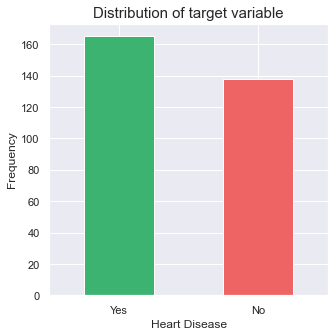

In [302]:
sns.set(style="darkgrid")
df1.heart_disease.value_counts().plot(kind="bar",figsize=(5,5),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=15)
plt.xlabel('Heart Disease',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [303]:
countNoDisease = len(df1[df1.heart_disease == "No"])
countHaveDisease = len(df1[df1.heart_disease == "Yes"])
print(f'no count: {countNoDisease}')
print(f'yes count: {countHaveDisease}')
print("Percentage of Patients do not have Heart Disease: {:.2f}%".format((countNoDisease / (len(df1.heart_disease)) * 100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df1.heart_disease)) * 100)))

no count: 138
yes count: 165
Percentage of Patients do not have Heart Disease: 45.54%
Percentage of Patients have Heart Disease: 54.46%


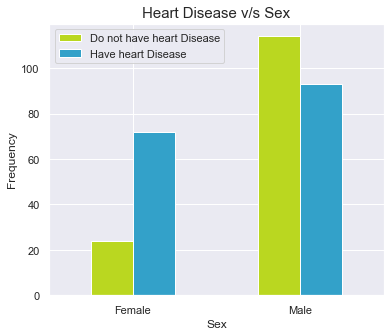

In [304]:
sns.set(style="darkgrid")
pd.crosstab(df1.sex,df1.heart_disease).plot(kind="bar",figsize=(6,5),color=['#BAD720',"#33A1C9"])
plt.title('Heart Disease v/s Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.ylabel('Frequency',fontsize=12)
plt.show()

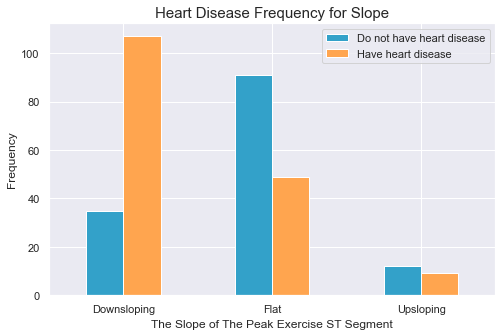

In [305]:
sns.set(style="darkgrid")
pd.crosstab(df1.st_slope, df1.heart_disease).plot(kind="bar", figsize=(8,5), color=["#33A1C9", "#FFA54F"], ax=plt.gca())
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.title("Heart Disease Frequency for Slope",fontsize=15)
plt.xlabel("The Slope of The Peak Exercise ST Segment",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Downsloping","Flat","Upsloping"])
plt.ylabel("Frequency",fontsize=12)
plt.show()

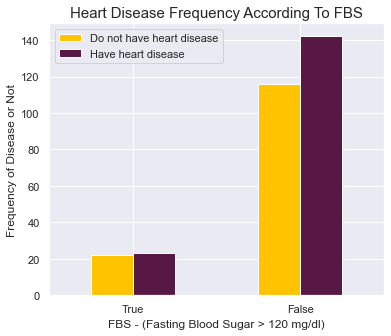

In [306]:
sns.set(style="darkgrid")
pd.crosstab(df1.fasting_blood_sugar, df1.heart_disease).plot(kind="bar", figsize=(6,5), color=["#FFC300", "#581845"], ax=plt.gca())
plt.title("Heart Disease Frequency According To FBS",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)",fontsize=12)
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

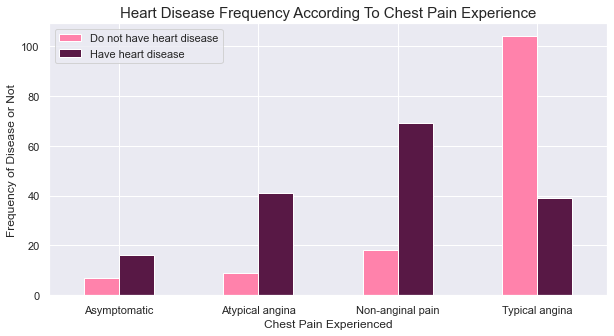

In [307]:
sns.set(style="darkgrid")
pd.crosstab(df1.chest_pain_type, df1.heart_disease).plot(kind="bar", figsize=(10, 5), color=["#FF82AB", "#581845"], ax=plt.gca())
plt.title("Heart Disease Frequency According To Chest Pain Experience",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced",fontsize=12)
plt.gca().set_xticklabels(
    labels=["Asymptomatic","Atypical angina","Non-anginal pain","Typical angina"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

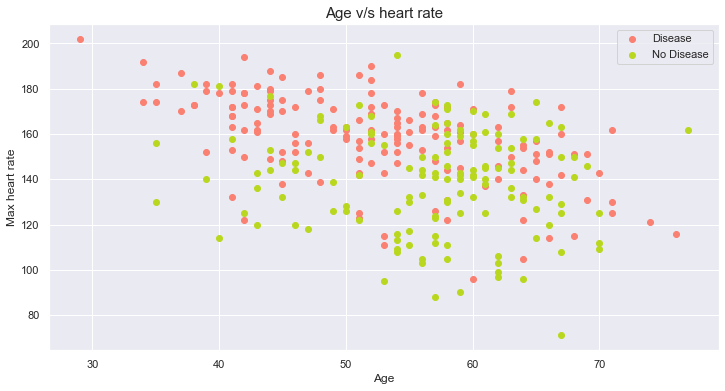

In [308]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df1.age[df1.heart_disease=='Yes'], df1.max_heart_rate_achieved[df1.heart_disease=='Yes'],color='salmon')
plt.scatter(df1.age[df1.heart_disease=='No'], df1.max_heart_rate_achieved[df1.heart_disease=='No'],color='#BAD720')

plt.title('Age v/s heart rate',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Max heart rate',fontsize=12)
plt.legend(['Disease','No Disease']);

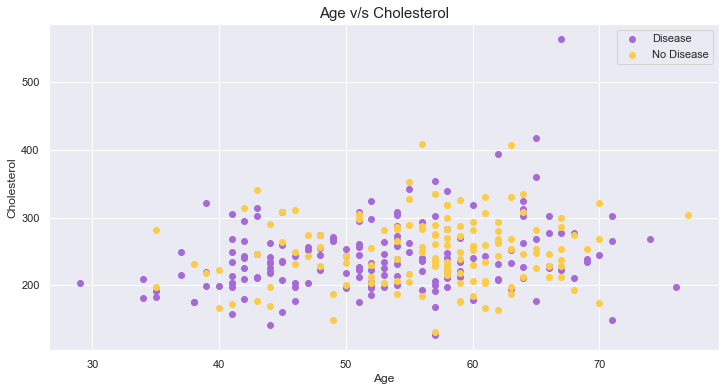

In [309]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df1.age[df1.heart_disease=='Yes'], df1.cholesterol[df1.heart_disease=='Yes'],color='#A569DA')
plt.scatter(df1.age[df1.heart_disease=='No'], df1.cholesterol[df1.heart_disease=='No'],color='#FCCC49')

plt.title('Age v/s Cholesterol',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Cholesterol',fontsize=12)
plt.legend(['Disease','No Disease']);

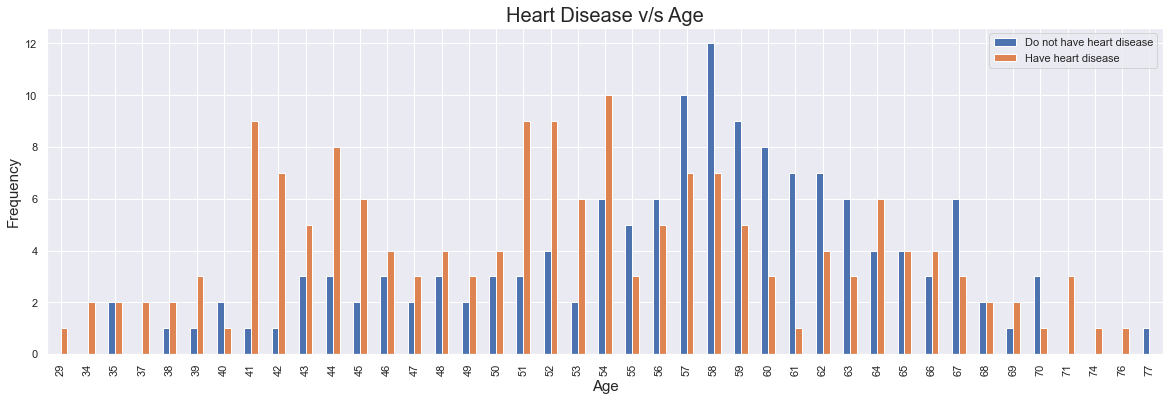

In [310]:
sns.set(style="darkgrid")
pd.crosstab(df1.age, df1.heart_disease).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease v/s Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

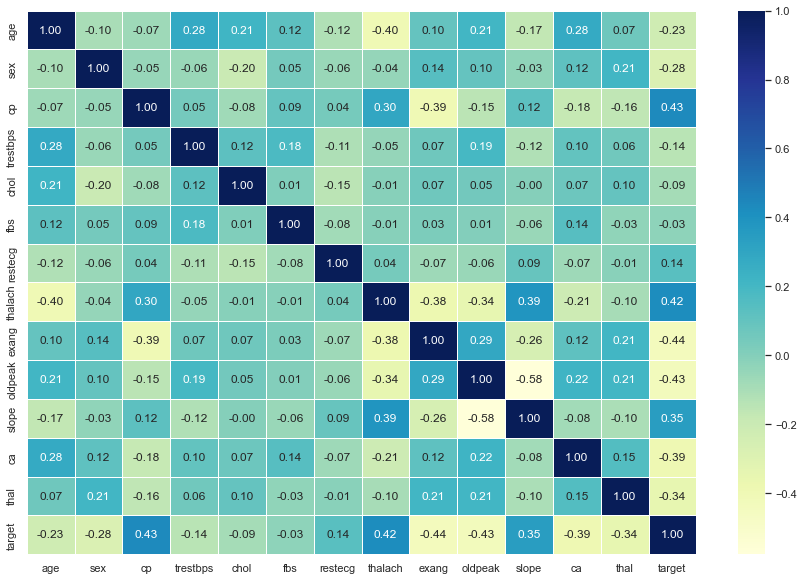

In [311]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu");


From the correlation heatmap, we observe following things:

-higher age ->  more likely heart disease

-higher blood sugar -> more likely heart disease

-higher cholesterol -> more likely heart disease

-lower maximum achieved heart rate -> more likely heart disease

## Pairwise relationship

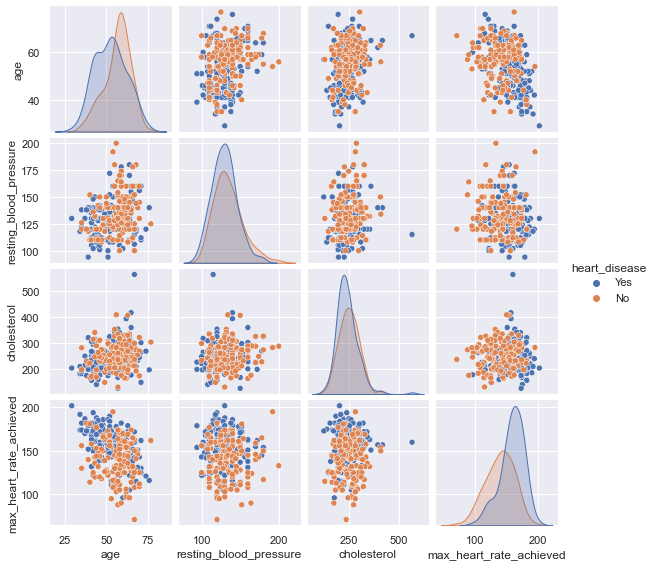

In [312]:
sns.set(style="darkgrid")
sns.pairplot(df1[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']+['heart_disease']], hue='heart_disease', height=2)
plt.show()

## Boxplots to check outliers

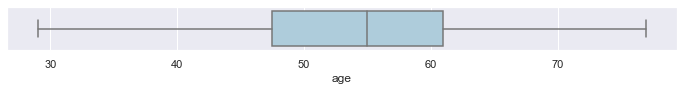

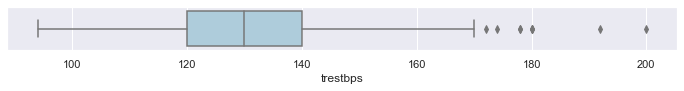

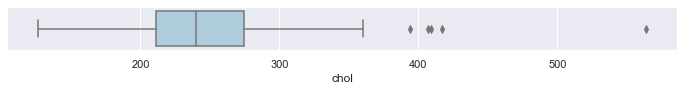

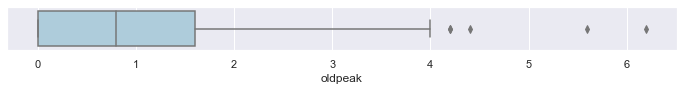

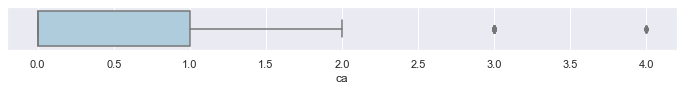

In [313]:
df2=df[['age','trestbps','chol','oldpeak','ca']]
for column in df2:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=df2, x=column,palette="Paired")

## Histograms

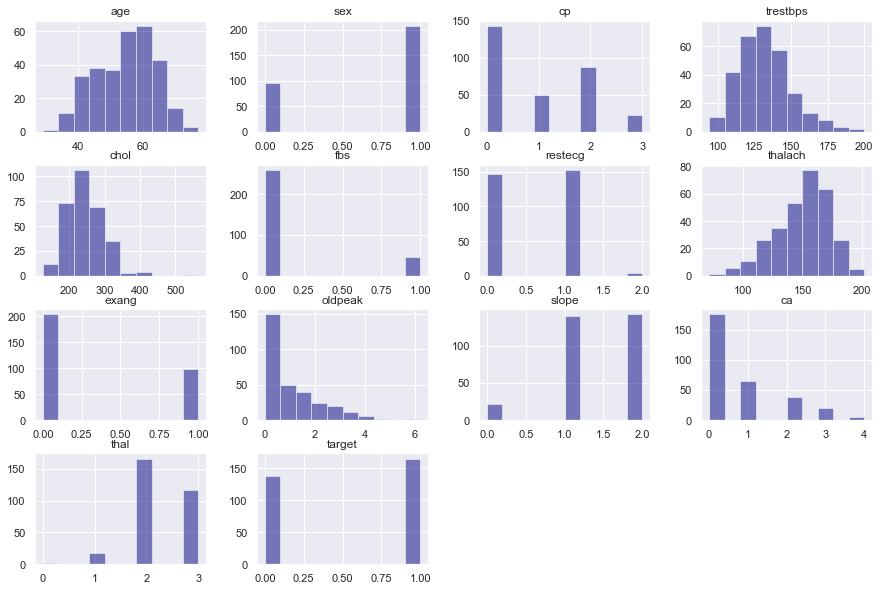

In [314]:
sns.set(style="darkgrid")
df.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

# Data Preprocessing

## Outlier Treatment

In [315]:
df = df.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

## Creating Dummy Variables 

In [316]:
a = pd.get_dummies(df["cp"], prefix="cp",drop_first=True)
b = pd.get_dummies(df["thal"], prefix="thal",drop_first=True)
c = pd.get_dummies(df["slope"], prefix="slope",drop_first=True)
d = pd.get_dummies(df["ca"], prefix="ca",drop_first=True)
e = pd.get_dummies(df["restecg"], prefix="restecg",drop_first=True)

In [317]:
frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis=1)
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0  63.0    1   3     145.0  233.0    1      0.0    150.0      0      2.3  ...   
1  37.0    1   2     130.0  250.0    0      1.0    187.0      0      3.5  ...   
2  41.0    0   1     130.0  204.0    0      0.0    172.0      0      1.4  ...   
3  56.0    1   1     120.0  236.0    0      1.0    178.0      0      0.8  ...   
4  57.0    0   0     120.0  354.0    0      1.0    163.0      1      0.6  ...   

   thal_2.0  thal_3.0  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  restecg_1.0  \
0         0         0        0        0     0     0     0     0            0   
1         1         0        0        0     0     0     0     0            1   
2         1         0        0        1     0     0     0     0            0   
3         1         0        0        1     0     0     0     0            1   
4         1         0        0        1     0     0     0     0            1   

   restecg_1.9800000000000182  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 27 columns]

In [318]:
df = df.drop(columns=["cp", "thal", "slope","ca","restecg"])
df.head()

age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  target  cp_1  \
0  63.0    1     145.0  233.0    1    150.0      0      2.3       1     0   
1  37.0    1     130.0  250.0    0    187.0      0      3.5       1     0   
2  41.0    0     130.0  204.0    0    172.0      0      1.4       1     1   
3  56.0    1     120.0  236.0    0    178.0      0      0.8       1     1   
4  57.0    0     120.0  354.0    0    163.0      1      0.6       1     0   

   ...  thal_2.0  thal_3.0  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  \
0  ...         0         0        0        0     0     0     0     0   
1  ...         1         0        0        0     0     0     0     0   
2  ...         1         0        0        1     0     0     0     0   
3  ...         1         0        0        1     0     0     0     0   
4  ...         1         0        0        1     0     0     0     0   

   restecg_1.0  restecg_1.9800000000000182  
0            0                           0  
1            1                           0  
2            0                           0  
3            1                           0  
4            1                           0  

[5 rows x 22 columns]

# 3.Evaluation
Accuracy is defined as the proportion of correct predictions made by the model out of the total number of predictions. It is a good metric to use when the target variable has a balanced class distribution, meaning that there is roughly an equal number of positive and negative instances. In this case, accuracy can provide a good indication of how well the model is performing overall.

we will split the data once (75% train) and use this split for all models because we want to compare 'apples to apples' (like we discussed in the lecture)

# Feature Selection

In [319]:
X = df.drop(["target"],axis = 1)
y = df.target

### Splitting the Data

In [320]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
print(f'test size:{X_test.shape[0]}')
print(f'train size:{X_train.shape[0]}')

test size:76
train size:227


# 4.Data description

a.train set: 227 exampels

test set: 76 exampels

b.number of featuers: 22

c.distribution of the labels: 

yes - 138 (45.54%) 

no - 165 (54.46%)

d.missing values: 0

e. graphs are in the EDA section

# 5.Data engineering
a,b. we recreated the categorical featuers as dummy columns and droped the old ones.

c. we didnt have missing values

# 6. Algorithem Performance

## Baseline algorithm

In [321]:
accuracies={}

In [322]:
base_algo=DummyClassifier(strategy='most_frequent',random_state=42)
base_algo.fit(X_train,y_train)
base_algo_score=base_algo.score(X_test,y_test)*100
accuracies['base_algo']=base_algo_score

## ML - Algorithems

## KNN
3 diferrent k values 3..5..7

In [1]:
k_list = [3,5,7]
score_l=[]
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    acc = (accuracy_score(y_test, y_pred))
    score_l.append(acc)
print(score_l)

NameError: name 'KNeighborsClassifier' is not defined

## KNN Tuning

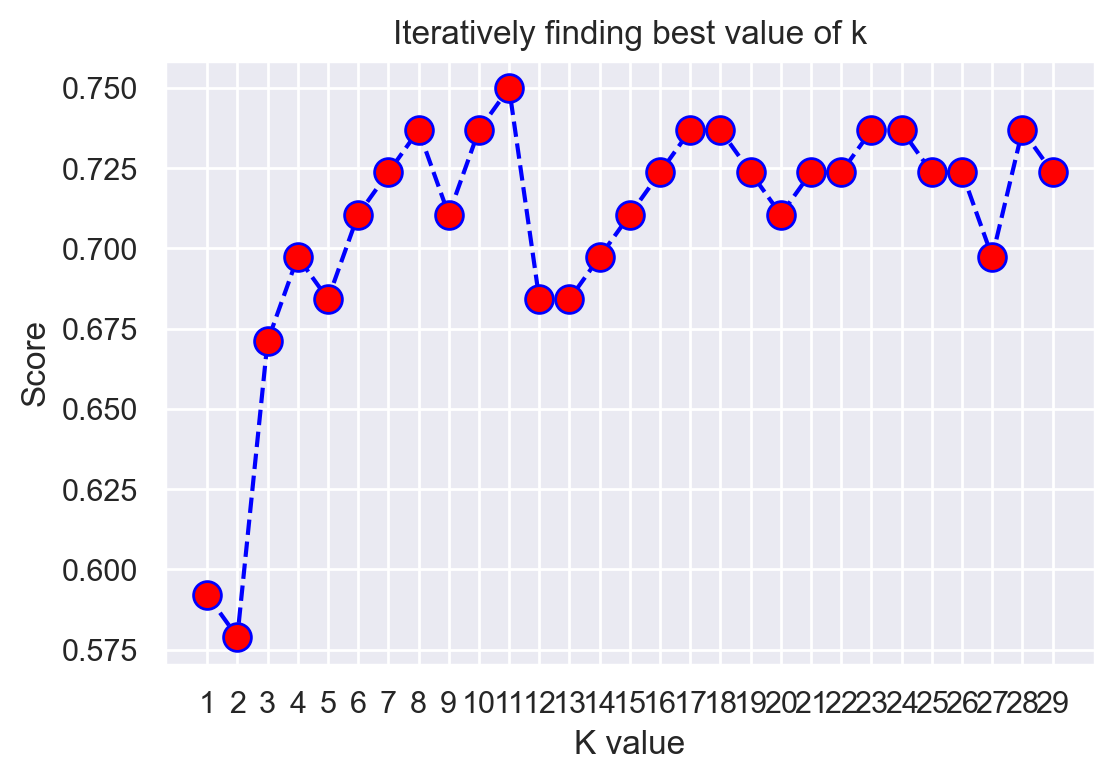

Maximum KNN Test Accuracy is 75.00% at K = 11


In [324]:
# try to find best k value
scoreList = []
for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn1.fit(X_train, y_train)
    scoreList.append(knn1.score(X_test, y_test))

plt.figure(dpi=200)
plt.plot(range(1, 30), scoreList,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xticks(np.arange(1, 30, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN"] = acc
print("Maximum KNN Test Accuracy is {:.2f}%".format(acc),"at K =",scoreList.index(max(scoreList))+1)

In [325]:
knn2 = KNeighborsClassifier(n_neighbors=11) 
knn2.fit(X_train, y_train)
y_test_pred1 = knn2.predict(X_test)

In [326]:
print(classification_report(y_test_pred1,y_test))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71        30
           1       0.83      0.74      0.78        46

    accuracy                           0.75        76
   macro avg       0.74      0.75      0.74        76
weighted avg       0.76      0.75      0.75        76



In [327]:
print(accuracies)

{'base_algo': 53.94736842105263, 'KNN': 75.0}


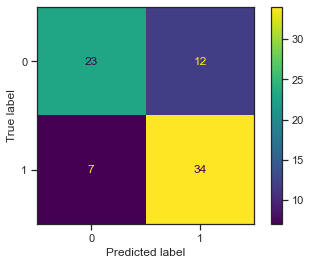

In [328]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_test, y_test_pred1, labels=knn2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn2.classes_)
disp.plot()

## Scaled KNN

In [329]:
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state = 42)

In [330]:
k_list = [3,5,7]
score_l=[]
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    acc = (accuracy_score(y_test, y_pred))
    score_l.append(acc)
print(score_l)

[0.7802197802197802, 0.8351648351648352, 0.8351648351648352]


In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf = dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
k_list = [3,5,7]
score_l=[]
for k in k_list:
    dt_clf  = DecisionTreeClassifier(max_depth=2)
    dt_clf = dt_clf.fit(X_train,y_train)
    y_pred = dt_clf.predict(X_test)
    acc = (accuracy_score(y_test, y_pred))
    score_l.append(acc)
print(score_l)

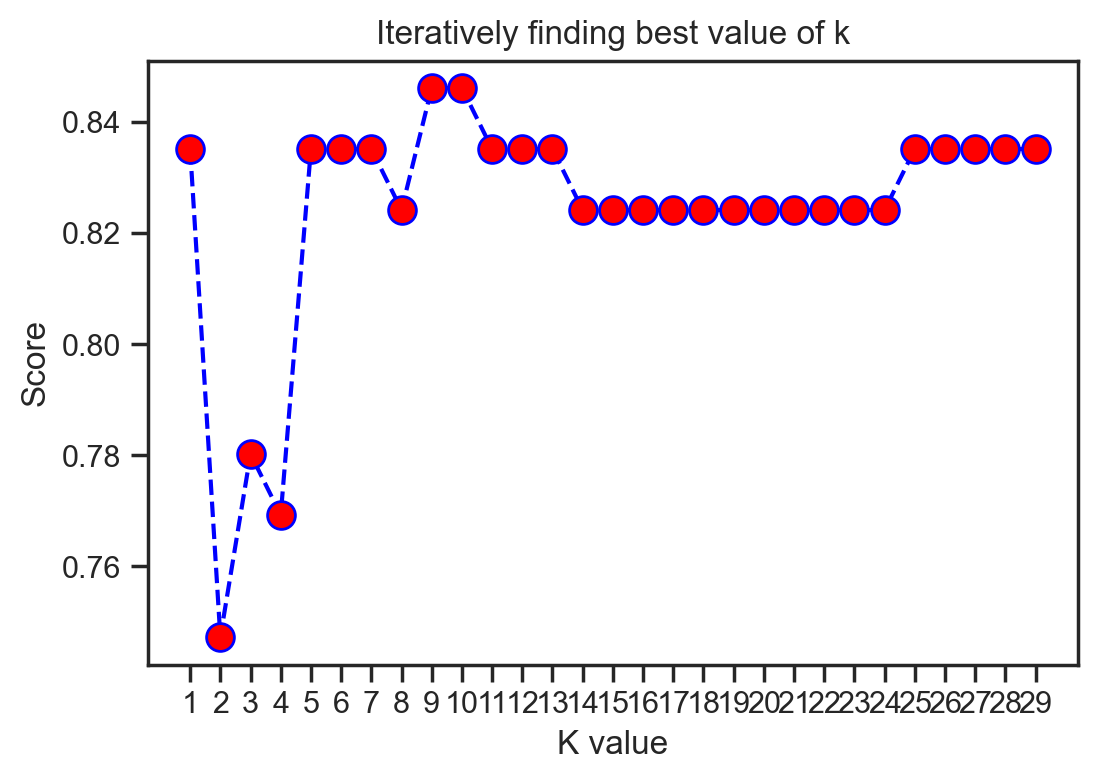

Maximum KNN Scaled Test Accuracy is 84.62% at K = 9


In [331]:
scoreList = []
for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn1.fit(X_train, y_train)
    scoreList.append(knn1.score(X_test, y_test))

plt.figure(dpi=200)
plt.plot(range(1, 30), scoreList,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xticks(np.arange(1, 30, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN Scaled"] = acc
print("Maximum KNN Scaled Test Accuracy is {:.2f}%".format(acc),"at K =",scoreList.index(max(scoreList))+1)

In [332]:
print(accuracies)

{'base_algo': 53.94736842105263, 'KNN': 75.0, 'KNN Scaled': 84.61538461538461}


## Decision Tree

In [333]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_test_pred3 = dtc.predict(X_test)
acc = accuracy_score(y_test_pred3, y_test) * 100
accuracies["Decision Tree"] = acc
print("Decision Tree Test Accuracy is {:.2f}%".format(acc))

Decision Tree Test Accuracy is 73.63%


## Decision Tree-RandomizedSearchCV

instade of use 3 diffrent values we decided to use the RandomizedSearchCV module and to test it out with range of 10.

In [334]:
param_dist = {'max_depth': np.arange(1, 10),
             'max_features': np.arange(1,10) , "min_samples_leaf": np.arange(1,10),"criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(dtc, param_dist, cv = 5)
  
tree_cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [335]:
(tree_cv.best_params_)

{'min_samples_leaf': 9, 'max_features': 4, 'max_depth': 9, 'criterion': 'gini'}

In [336]:
dtc1 = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 8,
 max_features= 3,
 min_samples_leaf= 3)
dtc1.fit(X_train, y_train)
y_test_pred3 = dtc1.predict(X_test)

In [337]:
print(classification_report(y_test_pred3,y_test))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        37
           1       0.80      0.74      0.77        54

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



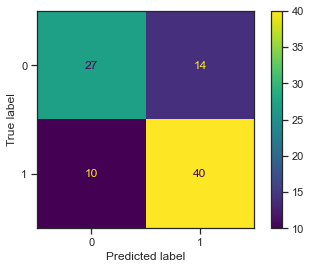

In [338]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_test, y_test_pred3, labels=dtc1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc1.classes_)
disp.plot()

In [339]:
acc = accuracy_score(y_test_pred3, y_test) * 100
accuracies["Tuend Decision Tree"] = acc
print(accuracies)

{'base_algo': 53.94736842105263, 'KNN': 75.0, 'KNN Scaled': 84.61538461538461, 'Decision Tree': 73.62637362637363, 'Tuend Decision Tree': 73.62637362637363}


# Random Forest

In [340]:
rf = RandomForestClassifier(random_state = 42, n_estimators = 100)
rf.fit(X_train, y_train)
y_test_pred5 = rf.predict(X_test)
acc_rf = accuracy_score(y_test_pred5, y_test) * 100
accuracies['Random Forest']= acc_rf
acc_rf

81.31868131868131

In [341]:
print(classification_report(y_test_pred5,y_test))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



here we decided to use grid search to try diffrent values for n_estiamtors (not just 100) and for max_depth .

In [342]:
param_tuned = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [12,13,14,15,16,17,18],
                'max_depth':[2,3,4,5,6,7,8,9,10,11,12]}
gscv_Rf = RandomizedSearchCV(rf, 
                        param_tuned, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [343]:
gscv_results = gscv_Rf.fit(X_train, y_train)
gscv_results.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.7921373200442968

In [344]:
gscv_results.best_params_

{'n_estimators': 70, 'max_features': 12, 'max_depth': 6}

## Feature Importance

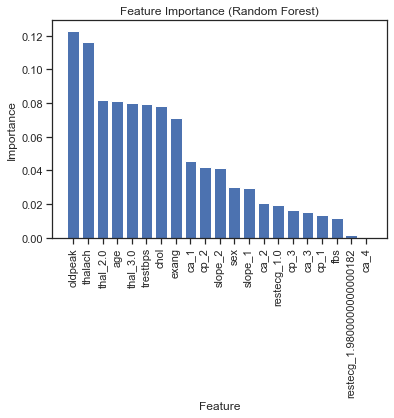

In [345]:
importances = rf.feature_importances_ 
indices = np.argsort(importances)[::-1]


plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [346]:
rf1 = RandomForestClassifier(max_features= 13, n_estimators= 70,max_depth=3, random_state=42)
rf1.fit(X_train, y_train)
y_test_pred5 = rf1.predict(X_test)

acc = accuracy_score(y_test_pred5, y_test) * 100
accuracies["Tuned Random Forest"] = acc

In [347]:
print(classification_report(y_test_pred5,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



## ADAboost

In [348]:
adab = AdaBoostClassifier(random_state = 42)
param_grid = {'n_estimators': [70,80,90,100],
              'learning_rate': [0.001,0.01,0.1],}
grid = GridSearchCV(adab, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters: ", grid.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 70}


In [349]:
abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                         n_estimators=70,
                         learning_rate=0.1,
                         random_state = 42)
model = abc.fit(X_train, y_train)
y_test_pred6 = model.predict(X_test)
acc1 = accuracy_score(y_test_pred6, y_test) * 100
acc1

84.61538461538461

In [350]:
abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2),
                         n_estimators=70,
                         learning_rate=0.1,
                         random_state = 42)
model = abc.fit(X_train, y_train)
y_test_pred6 = model.predict(X_test)
acc2 = accuracy_score(y_test_pred6, y_test) * 100
acc2

80.21978021978022

In [351]:
abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3),
                         n_estimators=70,
                         learning_rate=0.1,
                         random_state = 42)
model = abc.fit(X_train, y_train)
y_test_pred6 = model.predict(X_test)
acc3 = accuracy_score(y_test_pred6, y_test) * 100
acc3

79.12087912087912

In [352]:
accuracies["AdaBoost"] = acc1

# XGBoost

In [353]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

param_grid = {'max_depth': [2,3, 5],
              'learning_rate': [0.05, 0.1, 0.15],
              'n_estimators': [200, 300, 400]}

# create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, verbose= False)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [354]:
xg = xgb.XGBClassifier(learning_rate= 0.1, max_depth = 3, n_estimators = 300)
model = xg.fit(X_train, y_train)
y_test_pred7 = model.predict(X_test)
acc_xg = accuracy_score(y_test_pred7, y_test) * 100
acc_xg

84.61538461538461

In [355]:
accuracies["XG_Boost"] = acc_xg

## 7.Algorithm introspection 

## model comparison

<Figure size 720x480 with 0 Axes>

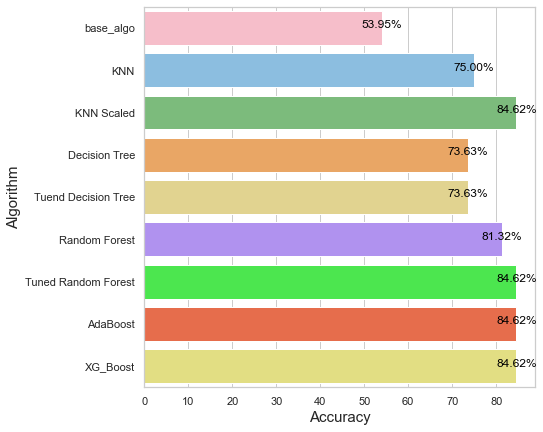

In [356]:
colors = ["#FFB5C5", "#7EC0EE", "#71C671", "#FFA54F", "#EEDC82", "#AB82FF","#33FF36","#FF5E33","#F2EC73","#4018F7"]

sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Algorithm",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
g = sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), palette=colors, orient="h")
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()

7a. In order to obtain an accuracy index that will be a basis for tuning a decision tree model, we used the deafualt model that does not take into account the depth of the tree and the number of splits to divide.
Then, with the help of the randomized CV package, we ran a number of variations in the range from 1-10 to examine what the best hyperparameters are, including the distribution criterion (Gini / entropy).
After that we ran the tree with the parameters we got and the accuracy index was higher than the base index of the same model

7b. as you can see above in the random forest section

# 8. HyperParmeters

for every algorithem during the model building we tuned the hyperparmeters after observing the resualt of the deafult values.as you can see in the algorithem comparison the tuned models (KNN,Random Forest) preforemd better and achived higher accuracy score. 

# 9.Additional analysis 

In [357]:
knn = KNeighborsClassifier(n_neighbors = 9)
best_knn_model = knn.fit(X_train, y_train)
knn_y_pred = best_knn_model.predict(X_test)


xgb_test_pred= y_test_pred7
knn_test_pred=knn_y_pred
rf_test_pred=y_test_pred5


combined_preds = np.average([xgb_test_pred, rf_test_pred, knn_test_pred], axis=0, weights=[0.3, 0.3, 0.4])
#combined_preds_as_df=pd.DataFrame(combined_preds)
rounded_combined_preds=np.array(np.where(combined_preds >= 0.5, 1, 0))
print(accuracy_score(rounded_combined_preds,y_test))

0.8461538461538461


 the highest accuracy score we got is 84.6%, we saw that XGBoost returned the same score as weaker models then him such as Random Forest. after tuning all the hyperparameters we still didnt successed to preform better. so from our analasyis  
84.6% is the  accuracy that we expected to achive with this combination of models.